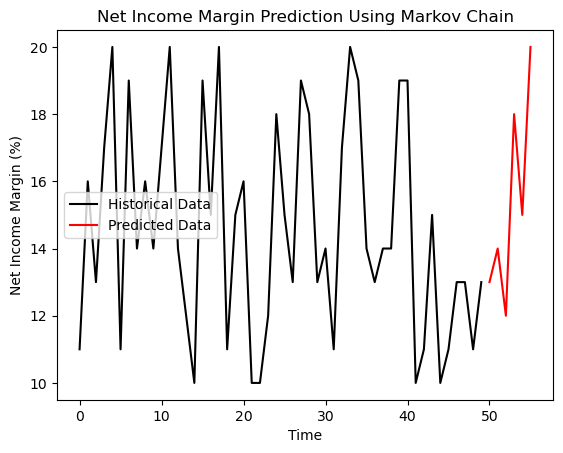

In [1]:
"""
Markov chain to predict net income margins of company.
استفاده از زنجیر مارکو برای تخمین حاشیه سود خالص
نویسنده: سالار دلاورقشقایی
"""
import openseespy.opensees as ops
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate example historical net income margins (percentages) using random numbers
historical_data = [random.randint(10, 20) for _ in range(50)]

# Define states based on net income margin ranges
states = sorted(list(set(historical_data)))
n_states = len(states)

# Initialize transition matrix
transition_matrix = np.zeros((n_states, n_states))

# Populate transition matrix based on historical data
for (i, j) in zip(historical_data[:-1], historical_data[1:]):
    i_index = states.index(i)
    j_index = states.index(j)
    transition_matrix[i_index, j_index] += 1

# Normalize transition matrix to get probabilities
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Function to predict future state
def predict_next_state(current_state, transition_matrix, states):
    current_index = states.index(current_state)
    next_state_probabilities = transition_matrix[current_index]
    next_state = np.random.choice(states, p=next_state_probabilities)
    return next_state

# Predict future net income margins
n_predictions = 5
current_state = historical_data[-1]
predictions = [current_state]

for _ in range(n_predictions):
    next_state = predict_next_state(current_state, transition_matrix, states)
    predictions.append(next_state)
    current_state = next_state

# Plot results
plt.plot(range(len(historical_data)), historical_data, label='Historical Data', color='black')
plt.plot(range(len(historical_data), len(historical_data) + n_predictions + 1), predictions, label='Predicted Data', color='red')
plt.xlabel('Time')
plt.ylabel('Net Income Margin (%)')
plt.title('Net Income Margin Prediction Using Markov Chain')
plt.legend()
plt.show()


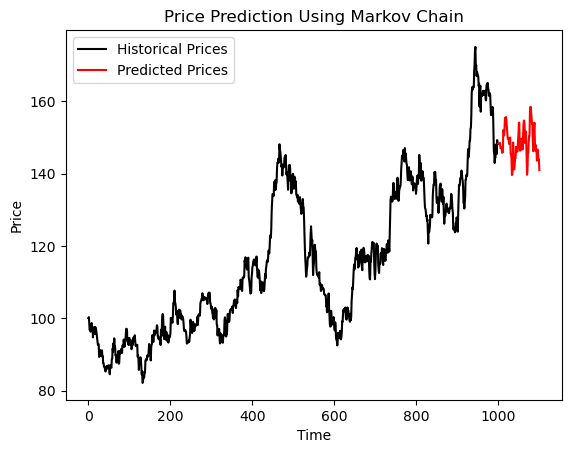

In [2]:
"""
markov chain to predict prices
استفاده از زنجیر مارکو برای تخمین قیمت سهام
نویسنده: سالار دلاورقشقایی
"""
import random
import numpy as np
import matplotlib.pyplot as plt

# Function to generate prices
def Generate_Prices(start_price, Volatility, Direction_Bias, num_days):
    prices = [start_price]
    changes = [0]
    for i in range(num_days-1):
        Var = random.uniform(-1, 1) * random.uniform(0, 1) * Volatility
        price = prices[-1] * (1 + Var + Direction_Bias)
        prices.append(price)
        changes.append(price / prices[-2] - 1)
    return prices, changes

# Generate historical data
start_price = 100
Volatility = 0.05
Direction_Bias = 0.0001
num_days = 1000
prices, changes = Generate_Prices(start_price, Volatility, Direction_Bias, num_days)

# Define states based on percentage changes
bins = np.linspace(min(changes), max(changes), 10)  # Adjust the number of bins as needed
states = np.digitize(changes, bins)
n_states = len(bins)

# Initialize transition matrix
transition_matrix = np.zeros((n_states, n_states))

# Populate transition matrix
for (i, j) in zip(states[:-1], states[1:]):
    transition_matrix[i-1, j-1] += 1

# Normalize transition matrix
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Function to predict future state
def predict_next_state(current_state, transition_matrix):
    next_state_probabilities = transition_matrix[current_state-1]
    next_state = np.random.choice(range(1, n_states+1), p=next_state_probabilities)
    return next_state

# Predict future prices using Markov Chain
n_predictions = 100
current_state = states[-1]
predicted_changes = [changes[-1]]

for _ in range(n_predictions):
    next_state = predict_next_state(current_state, transition_matrix)
    predicted_change = (bins[next_state-1] + bins[next_state]) / 2  # Average change for the bin
    predicted_changes.append(predicted_change)
    current_state = next_state

predicted_prices = [prices[-1]]

for change in predicted_changes[1:]:
    next_price = predicted_prices[-1] * (1 + change)
    predicted_prices.append(next_price)

# Plot results
plt.plot(range(len(prices)), prices, label='Historical Prices' ,color='black')
plt.plot(range(len(prices), len(prices) + len(predicted_prices)), predicted_prices, label='Predicted Prices' ,color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Price Prediction Using Markov Chain')
plt.legend()
plt.show()